# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
# 1. some entries of age are birth year
# 2. plans_university and past_failures are merged into one column
# 3. some entries in traveltime are minutes
# 4. 

import pandas as pd
import numpy as np

table=pd.read_csv('data.csv')

initialSize=len(table)

#1.
ages=table['age'].to_numpy()
ages=(ages*(ages<100))+((ages>=100)*(np.array([2006]*len(ages))-ages))
table['age']=ages

#2.
mergedColumn=table['plans_universitypast_failures'].to_numpy()
table=table.drop(columns=['plans_universitypast_failures'])
table['plans_university']=1*(mergedColumn>0)-1*(mergedColumn<0)
table['past_failures']=abs(mergedColumn-10*(table['plans_university']))

#3.
table['traveltime']=table['traveltime']*(table['traveltime']<=4)+((table['traveltime']>4)*(4))



print(table)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3           4          2       4         5    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nu

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [2]:
# goout, Dalc, Walc


#goout
isnull=table['goout'].isna()
med=table['goout'].median()
table['goout'][isnull]=med

#Dalc
isnull=table['Dalc'].isna()
med=table['Dalc'].median()
table['Dalc'][isnull]=med

#Walc
isnull=table['Walc'].isna()
med=table['Walc'].median()
table['Walc'][isnull]=med


/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_1428/3013916524.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['goout'][isnull]=med
/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_1428/3013916524.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Dalc'][isnull]=med
/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_1428/3013916524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [3]:
do_normilize=1
age18_norm=(18.0-table['age'].min())/(table['age'].max()-table['age'].min())
for column in table:
    if do_normilize:
        table[column]=(table[column]-table[column].min())/(table[column].max()-table[column].min())
    

results=pd.read_csv('scores.csv',header=None)
if do_normilize:
    results=results/100
results=results.squeeze()
print(results)

0      0.70
1      0.85
2      0.45
3      0.55
4      0.55
       ... 
644    0.50
645    0.75
646    0.50
647    0.40
648    0.75
Name: 0, Length: 649, dtype: float64


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from random import shuffle

testPart=0.3


X_train, X_test, y_train, y_test = train_test_split(table, results, test_size=testPart, random_state=1)

X_test.reset_index(drop=True)
y_test.reset_index(drop=True)

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=4, shuffle=True, random_state=1)
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=kf)

print("Cross-validation scores:", scores)
print("Mean:", scores.mean())

reg = LinearRegression().fit(X_train.values, y_train)
print(reg.coef_)


minEr=1000
maxEr=0
meanEr=0

errs=[]

for i in range(len(X_test)):
    din=X_test.iloc[i].values
    dres=y_test.iloc[i]
    err=abs(reg.predict([din])-dres)
    minEr=min(minEr,err)
    maxEr=max(maxEr,err)
    meanEr+=err
    errs.append(err*100)

errs.sort()
meanEr/=len(X_test)

print('minEr ',minEr[0]*100)
print('maxEr ',maxEr[0]*100)
print('meanEr ',meanEr[0]*100)
print('medEr ',errs[len(errs)//2][0])

print(reg.score(X_test.values,y_test))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross-validation scores: [0.25376426 0.10514888 0.26884465 0.27182953]
Mean: 0.2248968319441862
[ 0.12838368  0.04512095  0.03485546  0.01131596  0.0681495   0.01790756
 -0.03688842 -0.03269412 -0.09107215 -0.01272997 -0.03462404 -0.00155029
  0.03205916  0.01620868  0.00112038 -0.02287585  0.0926071  -0.30095372]
minEr  0.04161082390110593
maxEr  67.08859734521917
meanEr  10.742558784807441
medEr  8.156740191004296
0.18936710419859204


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [5]:
#school support
school_sup=np.genfromtxt('school_support.txt', delimiter=',')

table['school_support']=0
table['school_support'][school_sup]=1


#attendace

att=np.genfromtxt('attendance.csv', delimiter=',',dtype=str)
df = pd.read_csv("attendance.csv", sep=";", header=0)
table['attendance']=df.notna().sum(axis=1)
if do_normilize:
    table['attendance']=(table['attendance']-table['attendance'].min())/(table['attendance'].max()-table['attendance'].min())
#print(df)

#print(table.head(10))


X_train, X_test, y_train, y_test = train_test_split(table, results, test_size=testPart, random_state=1)

X_test.reset_index(drop=True)
y_test.reset_index(drop=True)

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=4, shuffle=True, random_state=1)
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=kf)

print("Cross-validation scores:", scores)
print("Mean:", scores.mean())

reg = LinearRegression().fit(X_train.values, y_train)
print(reg.coef_)


minEr=1000
maxEr=0
meanEr=0

errs=[]

for i in range(len(X_test)):
    din=X_test.iloc[i].values
    dres=y_test.iloc[i]
    err=abs(reg.predict([din])-dres)
    err*=100
#    if err>=50:
#        print(X_test.iloc[i])
#        print(dres)
#        print(reg.predict([din]))
#        print('\n\n\n\n')
    minEr=min(minEr,err)
    maxEr=max(maxEr,err)
    meanEr+=err
    errs.append(err)

errs.sort()
meanEr/=len(X_test)

print('minEr ',minEr[0])
print('maxEr ',maxEr[0])
print('meanEr ',meanEr[0])
print('medEr ',errs[len(errs)//2][0])

print(reg.score(X_test.values,y_test))


Cross-validation scores: [0.25687788 0.1321766  0.27730387 0.20626967]
Mean: 0.2181570048787656
[ 0.11199678  0.04023391  0.04180341  0.0080028   0.06828617  0.01622547
 -0.03873959 -0.03477844 -0.07773691 -0.01905525 -0.03266119 -0.00677641
  0.03182614  0.01259353 -0.00469418 -0.0220066   0.09336261 -0.28794091
 -0.05320285  0.05174414]
minEr  0.06490950831999909
maxEr  68.44275670020676
meanEr  10.672588253366708
medEr  7.571743159790262
0.19447758847563157


/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_1428/3292431037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['school_support'][school_sup]=1


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

/var/folders/y2/c69sxmws3g74xc3vjslh7dhm0000gp/T/ipykernel_1428/1727946285.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


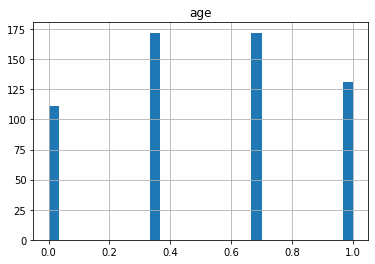

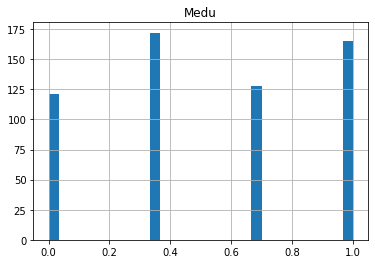

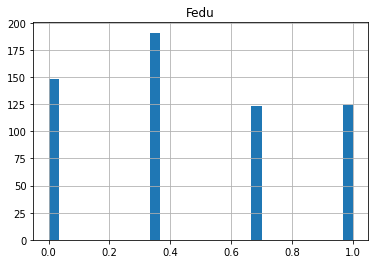

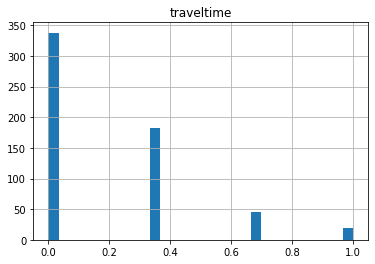

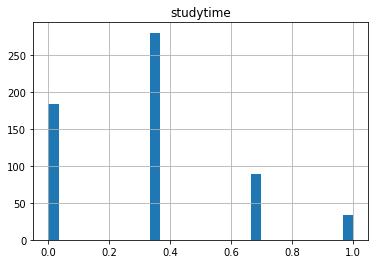

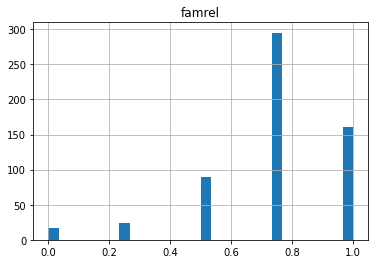

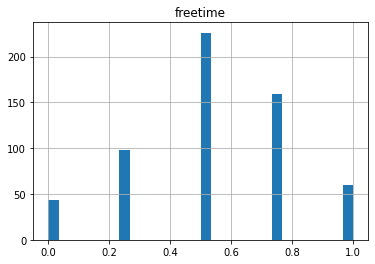

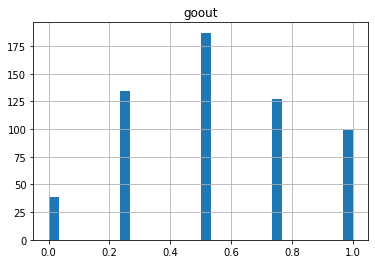

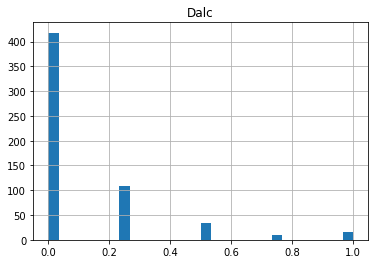

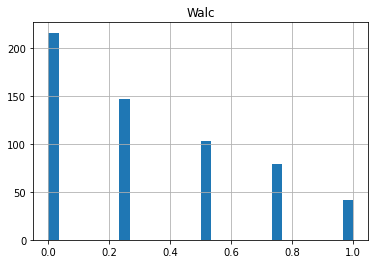

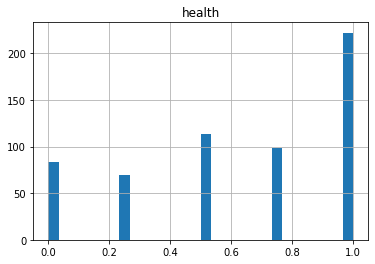

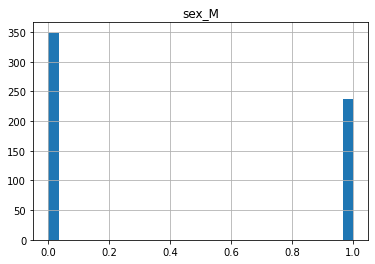

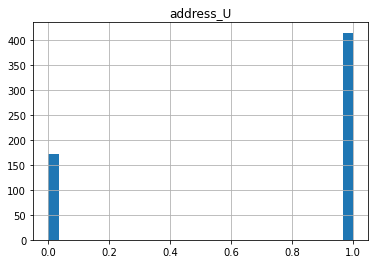

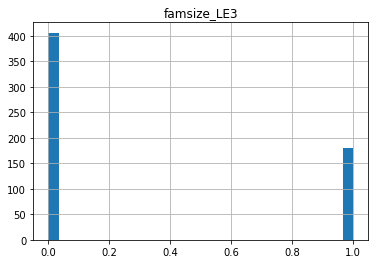

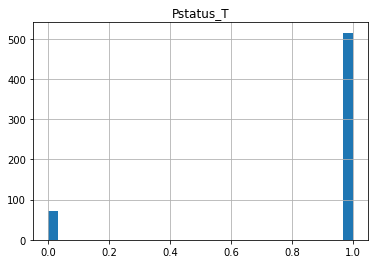

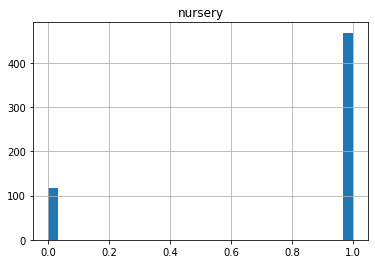

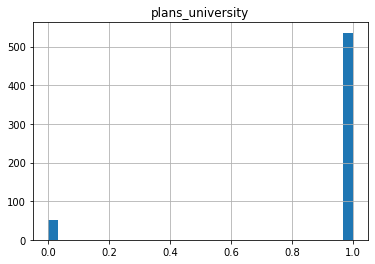

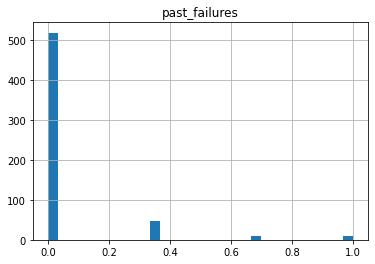

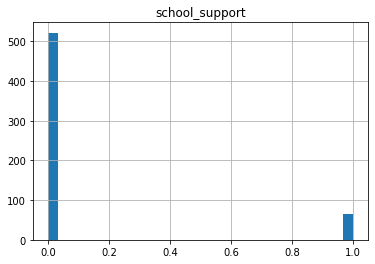

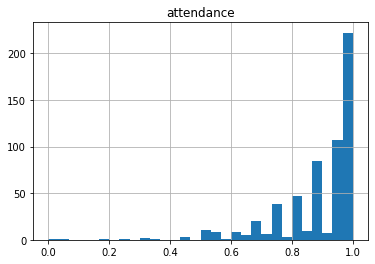

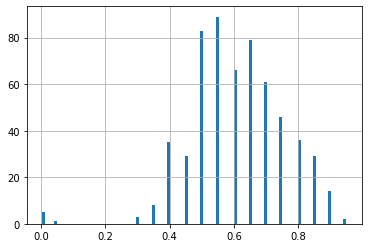

In [6]:
#print(table['past_failures'])
import matplotlib.pyplot as plt

#delete ages>18, Fedu==0 or Medu==0, results==0
results = results.drop(table[table['age'] > age18_norm].index)
table = table.drop(table[table['age'] > age18_norm].index)

results = results.drop(table[table['Fedu'] == 0].index)
table = table.drop(table[table['Fedu'] == 0].index)

results = results.drop(table[table['Medu'] == 0].index)
table = table.drop(table[table['Medu'] == 0].index)

table = table.drop(results[results == 0].index)
results = results.drop(results[results == 0].index)


for column in ['age','Fedu','Medu']:
    if do_normilize:
        table[column]=(table[column]-table[column].min())/(table[column].max()-table[column].min())

for col in table:
    hist = table.hist(column=col,bins=30)


plt.figure()
hist2 = results.hist(bins=100)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

age                 0.333333
Medu                0.666667
Fedu                0.666667
traveltime          0.000000
studytime           0.333333
famrel              0.750000
freetime            1.000000
goout               1.000000
Dalc                0.750000
Walc                0.750000
health              1.000000
sex_M               1.000000
address_U           1.000000
famsize_LE3         0.000000
Pstatus_T           1.000000
nursery             1.000000
plans_university    1.000000
past_failures       0.333333
school_support      0.000000
attendance          1.000000
Name: 436, dtype: float64
0.05
[0.49823062]





age                 0.666667
Medu                0.666667
Fedu                1.000000
traveltime          0.000000
studytime           0.666667
famrel              0.750000
freetime            0.750000
goout               1.000000
Dalc                0.000000
Walc                0.500000
health              1.000000
sex_M               0.000000
address_U           1.0

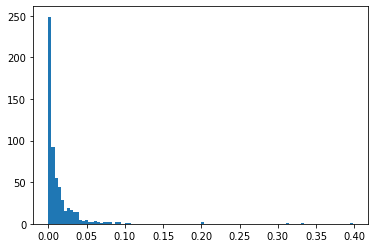

In [7]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

X_train, y_train = shuffle(table, results)

reg = linear_model.LinearRegression().fit(X_train.values, y_train) #create model and train it
#prediction = #calculate prediction for one object for vector x
#error = (prediction - y)**2 #simple error - square error

errs=[]
for i in range(len(X_train)):
    din=X_train.iloc[i].values
    dres=y_train.iloc[i]
    err=abs(reg.predict([din])-dres)
    err*=err
    errs.append(err[0])
    if err>=0.12:
        print(X_train.iloc[i])
        print(dres)
        print(reg.predict([din]))
        print('\n\n\n\n')

#print(errs)

plt.hist(errs,bins=100)
plt.show()

age                 0.333333
Medu                0.666667
Fedu                0.666667
traveltime          0.000000
studytime           0.333333
famrel              0.750000
freetime            1.000000
goout               1.000000
Dalc                0.750000
Walc                0.750000
health              1.000000
sex_M               1.000000
address_U           1.000000
famsize_LE3         0.000000
Pstatus_T           1.000000
nursery             1.000000
plans_university    1.000000
past_failures       0.333333
school_support      0.000000
attendance          1.000000
Name: 436, dtype: float64
0.05
[0.51595553]







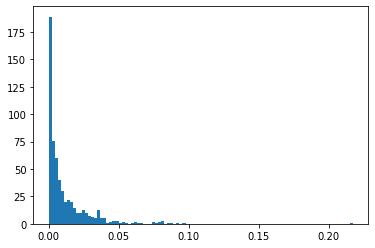

In [8]:
#if result <= 1 (after norm < 0.01), result*=100

results=(results>0.01)*results+(results*100)*(results<=0.01)



X_train, y_train = shuffle(table, results)

reg = linear_model.LinearRegression().fit(X_train.values, y_train) #create model and train it
#prediction = #calculate prediction for one object for vector x
#error = (prediction - y)**2 #simple error - square error

errs=[]
for i in range(len(X_train)):
    din=X_train.iloc[i].values
    dres=y_train.iloc[i]
    err=abs(reg.predict([din])-dres)
    err*=err
    errs.append(err[0])
    if err>=0.12:
        print(X_train.iloc[i])
        print(dres)
        print(reg.predict([din]))
        print('\n\n\n\n')

#print(errs)

plt.hist(errs,bins=100)
plt.show()

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [9]:
finalSize=len(table)

print('initial size: ',initialSize)
print('final size: ',finalSize)
print('deleted ',initialSize-finalSize,'entries, ',100*(initialSize-finalSize)/(initialSize+finalSize)*2,'%')


X_train, X_test, y_train, y_test = train_test_split(table, results, test_size=testPart, random_state=1)

X_test.reset_index(drop=True)
y_test.reset_index(drop=True)

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=4, shuffle=True, random_state=1)
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=kf)

print("Cross-validation scores:", scores)
print("Mean:", scores.mean())

reg = LinearRegression().fit(X_train.values, y_train)

it=0
weights=[]
for i in table:
    weights.append([reg.coef_[it],i])
    it+=1

def abs_(x):
    return -abs(x[0])
    
weights.sort(key=abs_)
print('\n\n')

for i in weights:
    print(i[1],' weight:',i[0])

#print(reg.coef_)
print('\n\n')

minEr=1000
maxEr=0
meanEr=0

errs=[]

for i in range(len(X_test)):
    din=X_test.iloc[i].values
    dres=y_test.iloc[i]
    err=abs(reg.predict([din])-dres)
    err*=100
#    if err>=50:
#        print(X_test.iloc[i])
#        print(dres)
#        print(reg.predict([din]))
#        print('\n\n\n\n')
    minEr=min(minEr,err)
    maxEr=max(maxEr,err)
    meanEr+=err
    errs.append(err)

errs.sort()
meanEr/=len(X_test)

print('minEr ',minEr[0])
print('maxEr ',maxEr[0])
print('meanEr ',meanEr[0])
print('medEr ',errs[len(errs)//2][0])

print(reg.score(X_test.values,y_test))

initial size:  649
final size:  586
deleted  63 entries,  10.20242914979757 %
Cross-validation scores: [0.18967541 0.24717661 0.19946425 0.19749947]
Mean: 0.20845393491007716



past_failures  weight: -0.1988893015910296
attendance  weight: 0.1292988047572713
plans_university  weight: 0.07802455486269408
Medu  weight: 0.07228529365275796
famrel  weight: 0.05851883662822271
studytime  weight: 0.05376629303710503
age  weight: 0.04880002406574868
school_support  weight: -0.04379319252648736
Dalc  weight: -0.0413889786278913
health  weight: -0.03226951531035184
sex_M  weight: -0.031888220366551576
address_U  weight: 0.03110034436482289
goout  weight: -0.021362164584287004
traveltime  weight: 0.02047989707741471
nursery  weight: -0.018770327510843402
Pstatus_T  weight: 0.016590114715312965
famsize_LE3  weight: 0.013542214302583724
freetime  weight: -0.006856050608434872
Fedu  weight: 0.005928814923434292
Walc  weight: -0.00012632816427918356



minEr  0.12130989637729739
maxEr  31.605514220

## Отчет

Посмотрим на точность предсказания после разных оптимизаций:

---

|Этап|Средняя ошибка|Медианная ошибка|
|-|-|-|
|Начальный|10.74|8.16|
|Добавление новых данных|10.67|7.57|
|Исправление данных|8.82|7.48|

---

Медианная ошибка изменилась не сильно, средняя уменьшилась.